### Description about the data

numcol: Number of honey producing colonies. Honey producing colonies are the maximum number of colonies from which honey was taken during the year. It is possible to take honey from colonies which did not survive the entire year

yieldpercol: Honey yield per colony. Unit is pounds

totalprod: Total production (numcol x yieldpercol). Unit is pounds

stocks: Refers to stocks held by producers. Unit is pounds

priceperlb: Refers to average price per pound based on expanded sales. Unit is dollars.

prodvalue: Value of production (totalprod x priceperlb). Unit is dollars.

Other useful information: Certain states are excluded every year (ex. CT) to avoid disclosing data for individual operations. Due to rounding, total colonies multiplied by total yield may not equal production. Also, summation of states will not equal U.S. level value of production.

### Questions to answer

1. How has honey production yield changed from 1998 to 2012?

2. Over time, which states produce the most honey? Which produce the least? 

3. Which have experienced the most change in honey yield?

4. Does the data show any trends in terms of the number of honey producing colonies and yield per colony before 2006, which was when concern over Colony Collapse Disorder spread nationwide?

5. Are there any patterns that can be observed between total honey production and value of production every year? 

6. How has value of production, which in some sense could be tied to demand, changed every year?

In [55]:
### Importing required packages 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white")
%matplotlib inline

In [56]:
### Importing data

data = pd.read_csv('honeyproduction.csv')
data.head()

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,AL,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,AZ,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,AR,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,CA,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,CO,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998


In [57]:
state_code_byname = {    
    'AK': 'Alaska',
    'AL': 'Alabama',
    'AR': 'Arkansas',
    'AZ': 'Arizona',
    'CA': 'California',
    'CO': 'Colorado',
    'CT': 'Connecticut',
    'DC': 'District of Columbia',
    'DE': 'Delaware',
    'FL': 'Florida',
    'GA': 'Georgia',
    'HI': 'Hawaii',
    'IA': 'Iowa',
    'ID': 'Idaho',
    'IL': 'Illinois',
    'IN': 'Indiana',
    'KS': 'Kansas',
    'KY': 'Kentucky',
    'LA': 'Louisiana',
    'MA': 'Massachusetts',
    'MD': 'Maryland',
    'ME': 'Maine',
    'MI': 'Michigan',
    'MN': 'Minnesota',
    'MO': 'Missouri',
    'MS': 'Mississippi',
    'MT': 'Montana',
    'NC': 'North Carolina',
    'ND': 'North Dakota',
    'NE': 'Nebraska',
    'NH': 'New Hampshire',
    'NJ': 'New Jersey',
    'NM': 'New Mexico',
    'NV': 'Nevada',
    'NY': 'New York',
    'OH': 'Ohio',
    'OK': 'Oklahoma',
    'OR': 'Oregon',
    'PA': 'Pennsylvania',
    'PR': 'Puerto Rico',
    'RI': 'Rhode Island',
    'SC': 'South Carolina',
    'SD': 'South Dakota',
    'TN': 'Tennessee',
    'TX': 'Texas',
    'UT': 'Utah',
    'VA': 'Virginia',
    'VT': 'Vermont',
    'WA': 'Washington',
    'WI': 'Wisconsin',
    'WV': 'West Virginia',
    'WY': 'Wyoming'
}
state_code_byname["WY"]
data["state_name"] = data["state"].apply(lambda x :state_code_byname[x])
data.head()

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year,state_name
0,AL,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998,Alabama
1,AZ,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998,Arizona
2,AR,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998,Arkansas
3,CA,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998,California
4,CO,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998,Colorado


### How has honey production yield changed from 1998 to 2012?

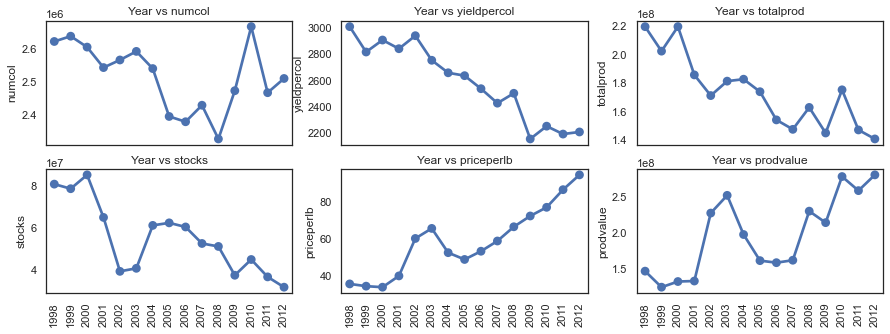

In [58]:
data_byyear = data.groupby("year")

flg,ax = plt.subplots(2,3,figsize=(15,5),sharex=True)
col_matrix = np.array([["numcol","yieldpercol","totalprod"],["stocks","priceperlb","prodvalue"]])

for i in range(0,2):
    for j in range(0,3):
        sns.pointplot(kind="point",data=data_byyear.sum().reset_index(),x="year",y=col_matrix[i,j],ax=ax[i,j])
        ax[i,j].set(title="Year vs {}".format(col_matrix[i,j]))
        ax[i,j].set_xlabel("")
        plt.setp(ax[i,j].xaxis.get_majorticklabels(), rotation=90)
plt.show()


###### Observation
###### 1. There is a reduction in Yield from 2003 , disappearing of working bees can be one of the reason which resulted reduction in number of colonies.
###### 2. On the other hand, cost of production is increasing due to the demand increase and reduction of honey production with in country 

### Over time, which states produce the most honey? Which produce the least?

In [59]:
data.dtypes
data.head()
data_bystate = data.groupby("state")
data_bystate_aggre = data_bystate.sum().sort_values(by=['totalprod'],ascending=False).reset_index()
data_bystate_aggre["state_name"] = data_bystate_aggre["state"].apply(lambda x:state_code_byname[x])
data_bystate_aggre["totalprod_per"] = round((data_bystate_aggre["totalprod"] / data_bystate_aggre["totalprod"].sum() )*100,2)


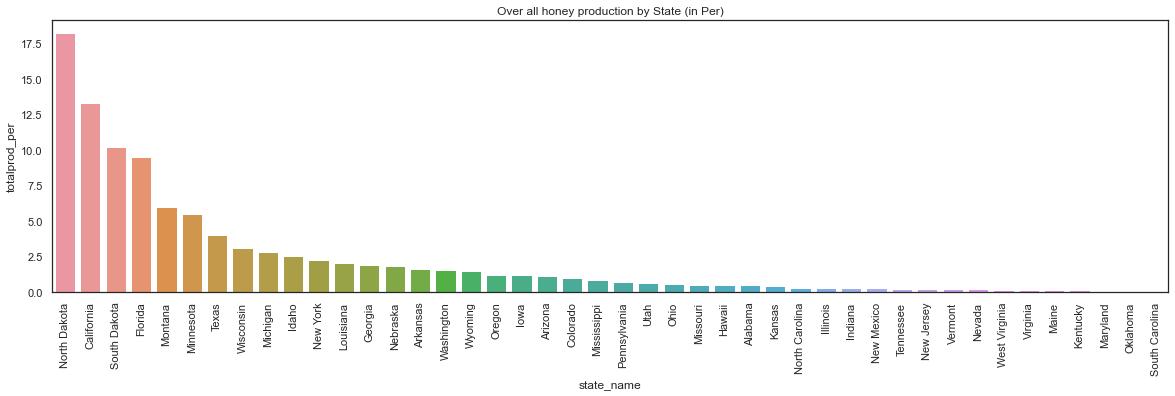

In [60]:
plt.figure(figsize=(20,5))
state_plot = sns.barplot(data = data_bystate_aggre,x="state_name",y="totalprod_per")
state_plot.set_xticklabels(state_plot.get_xticklabels(),rotation=90)
state_plot.set_title("Over all honey production by State (in Per)")
plt.show()



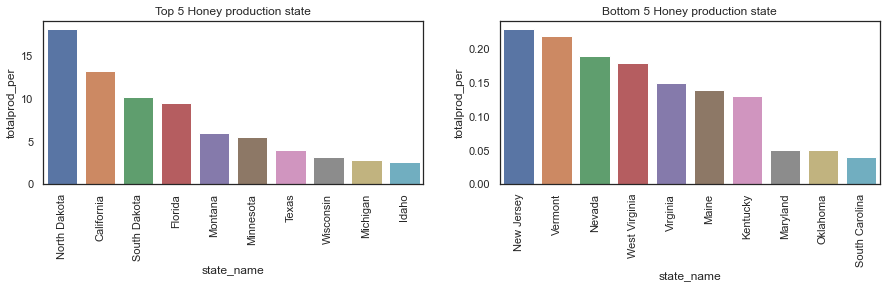

In [61]:

fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(15,3))
sns.barplot(data = data_bystate_aggre.head(10),x="state_name",y="totalprod_per",ax=ax[0])
ax[0].set(title="Top 5 Honey production state")
plt.setp(ax[0].xaxis.get_majorticklabels(), rotation=90)

sns.barplot(data = data_bystate_aggre.tail(10),x="state_name",y="totalprod_per",ax=ax[1])
ax[1].set(title="Bottom 5 Honey production state")
plt.setp(ax[1].xaxis.get_majorticklabels(), rotation=90)
plt.show()

In [62]:
correlations_by_state = pd.DataFrame(data_bystate_aggre[["state","state_name"]])
correlations_by_state.set_index("state",inplace=True)
#correlations_by_state

Compute the Correlation For Years comparing all the columns by each state

In [63]:
def compute_correlation_bystate(df, feature_1,feature_2):
    column = feature_1+'_vs_'+feature_2
    df[column] = 0
    corr_value = []
    for state in df.index:
        corr = data[data['state']==state][[feature_1, feature_2]].corr().at[feature_1, feature_2]
        corr_value.append(corr)
    df[column] = corr_value    
    return column

compute_correlation_bystate(correlations_by_state, 'numcol','year')
compute_correlation_bystate(correlations_by_state, 'yieldpercol','year')
compute_correlation_bystate(correlations_by_state, 'totalprod','year')
compute_correlation_bystate(correlations_by_state, 'stocks','year')
compute_correlation_bystate(correlations_by_state, 'priceperlb','year')
compute_correlation_bystate(correlations_by_state, 'prodvalue','year')
compute_correlation_bystate(correlations_by_state, 'numcol','yieldpercol')
compute_correlation_bystate(correlations_by_state, 'totalprod','prodvalue')
correlations_by_state = correlations_by_state.reset_index()

### 3. Which have experienced the most change in honey yield?

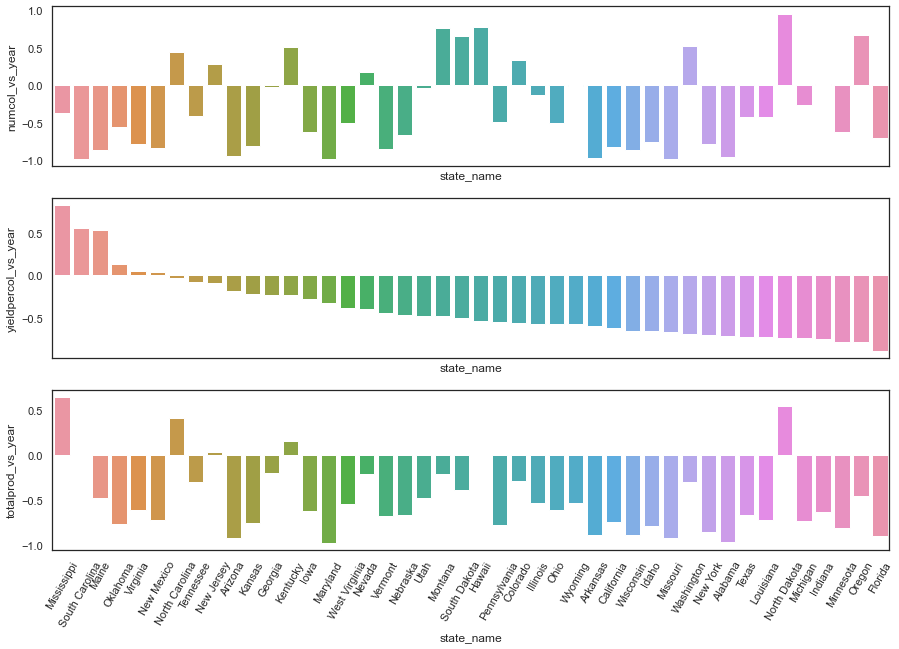

In [64]:
#correlations_by_state.sort_values()
fig, ax = plt.subplots(nrows=3,ncols=1,figsize=(15,10),sharex = True)
sns.barplot(data = correlations_by_state.sort_values(by="yieldpercol_vs_year",ascending=False),
            x="state_name",y="numcol_vs_year",ax=ax[0])
plt.setp(ax[0].xaxis.get_majorticklabels(), rotation=60)
sns.barplot(data = correlations_by_state.sort_values(by="yieldpercol_vs_year",ascending=False),
            x="state_name",y="yieldpercol_vs_year",ax=ax[1])
plt.setp(ax[1].xaxis.get_majorticklabels(), rotation=60)
sns.barplot(data = correlations_by_state.sort_values(by="yieldpercol_vs_year",ascending=False),
            x="state_name",y="totalprod_vs_year",ax=ax[2])
plt.setp(ax[2].xaxis.get_majorticklabels(), rotation=60)
plt.show()

In [65]:
# Postive Change - Yield has increaded as Year
correlations_by_state.sort_values(by="yieldpercol_vs_year",ascending=False).head()[["state_name","yieldpercol_vs_year"]]

,state_name,yieldpercol_vs_year
21,Mississippi,0.825222
43,South Carolina,0.554416
39,Maine,0.540572
42,Oklahoma,0.136135
38,Virginia,0.055339


In [66]:
# Negative Change - Yield has decrease as Year
correlations_by_state.sort_values(by="yieldpercol_vs_year",ascending=True).head()[["state_name","yieldpercol_vs_year"]]

,state_name,yieldpercol_vs_year
3,Florida,-0.889775
17,Oregon,-0.788779
5,Minnesota,-0.780121
31,Indiana,-0.748806
8,Michigan,-0.741915


### 4. Does the data show any trends in terms of the number of honey producing colonies and yield per colony before 2006, which was when concern over Colony Collapse Disorder spread nationwide?

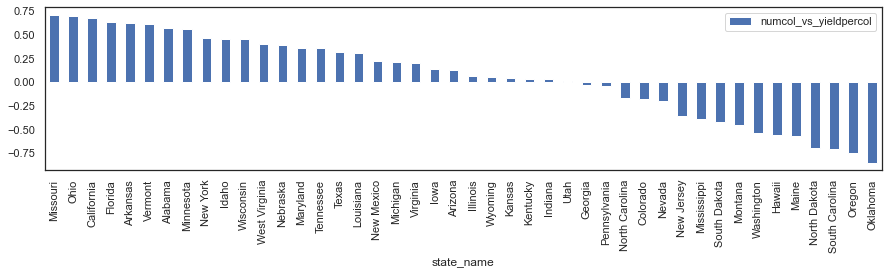

In [67]:
correlations_by_state.sort_values(by="numcol_vs_yieldpercol",ascending=False).plot(x="state_name",y="numcol_vs_yieldpercol",kind="bar",ax=plt.subplots(figsize=(15,3))[1])


### 5. Are there any patterns that can be observed between total honey production and value of production every year? 

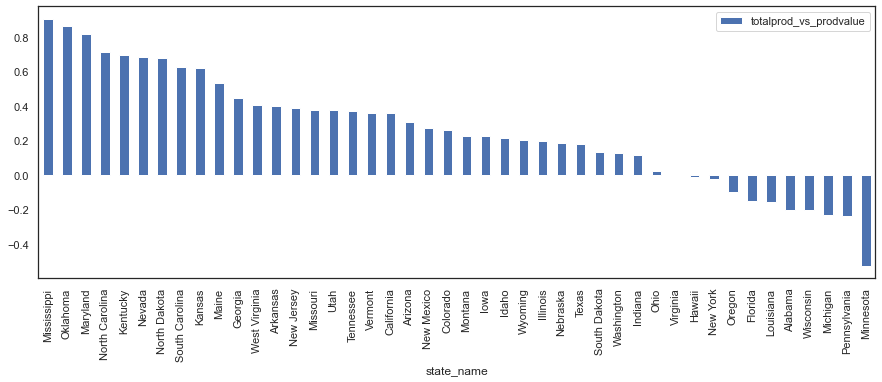

In [78]:
correlations_by_state.sort_values(by="totalprod_vs_prodvalue",ascending=False).plot(kind="bar",x="state_name",y="totalprod_vs_prodvalue",ax=plt.subplots(figsize=(15,5))[1])


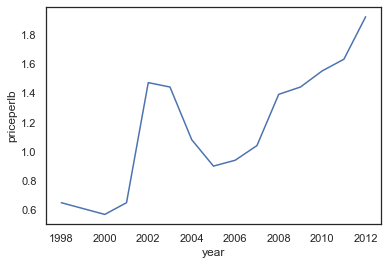

In [100]:
less_demand_state = correlations_by_state.loc[correlations_by_state['totalprod_vs_prodvalue'] <=-0.4]['state']
less_demand_state
#sns.pairplot(data=data.query('state == "MN"'),kind="reg")
sns.lineplot(data=data.query('state == "MN"'),x="year",y="priceperlb")
plt.show()
#data.query('state == "MN,kind


#### Observation

1. Most of the states showed the postive correlation bwt total honey production and production value
2. But "Minnesota" has high negative correlation - 
    2.1 there is a price dip from 2003-2005 and from 2006 price increased steeply 
    
